# Heating Profile

In [1]:
import pandas as pd
import numpy as np
# %matplotlib qt
import matplotlib.pyplot as plt
import scipy.optimize as opt
import dataToVar as dat


#### Make list of data until reaches 5% of max

In [2]:
def percFit(list):
    err = []
    ratioBot = np.average(list[-100:])/list
    for i in ratioBot:
        if i>1.05:
            err.append(i)
    percy = list[100:len(err)]
    percx = np.arange(0,len(percy))
    
    return list[100:len(err)]


##### Create CSV with collected data

In [3]:
nin = dat.nin
sev = dat.sev
fif = dat.fif
onet = dat.onet
ninTherm = dat.nint
sevTherm = dat.sevt
fifTherm = dat.fift
onetTherm = dat.onett

# print(len(fif))
# print(percFit(nin))
def makeCsv():
    ninFit = percFit(nin).tolist()
    sevFit = sev[100:len(ninFit)+100]
    fifFit = fif[100:len(ninFit)+100]
    onetFit = onet[100:len(ninFit)+100]
    ninThermFit = ninTherm[100:len(ninFit)+100]
    fifThermFit = fifTherm[100:len(ninFit)+100]
    sevThermFit = sevTherm[100:len(sevFit)+100]
    onetThermFit = onetTherm[100:len(onetFit)+100]

    # ninFit = nin[100:].tolist()
    # sevFit = sev[100:len(ninFit)+100]
    # fifFit = fif[100:len(ninFit)+100]
    # onetFit = onet[100:len(ninFit)+100]
    # print(ninFit)
    
    import pandas as pd
    dF = pd.DataFrame({'time':np.arange(0,len(ninFit)),
                        20:fifFit,
                        40:sevFit,
                        60:ninFit,
                        80:onetFit,
                        '20therm':fifThermFit,
                        '40therm':sevThermFit,
                        '60therm':ninThermFit,
                        '80therm':onetThermFit})
    dF.to_csv('percData.csv')
# makeCsv()

AttributeError: module 'dataToVar' has no attribute 'nin'

##### Plot 2D data

''

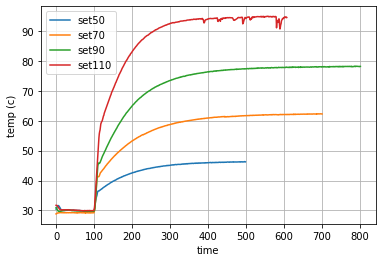

In [ ]:
plt.plot(fif,label='set50')
plt.plot(sev,label='set70')
plt.plot(nin,label='set90')
plt.plot(onet,label='set110')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('temp (c)')

;

#### Plot Tsamp vs Ttherm

In [ ]:
def fits(x,a,b,c,d,e):
    return x

x,nnn = opt.curve_fit(fits,dat.nint-min(dat.nint),nin)

plt.figure(figsize=(16, 9))
fift = dat.fift.tolist()
sevt = dat.sevt.tolist()
nint = dat.nint.tolist()
onett = dat.onett.tolist()
print(fift.index(max(fift)))
print(sevt.index(max(sevt)))
print(nint.index(max(nint)))
print(onett.index(max(onett)))
# plt.plot(dat.fift,fif)
# plt.plot(dat.sevt,sev)
# plt.plot(dat.nint-min(dat.nint),nin)
# plt.plot(fits(dat.nint-min(dat.nint),*x))
# plt.plot(dat.onett,onet)
# plt.grid()
;

109
107
110
119


C:\Users\JoshWhitehead\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


''

<Figure size 1152x648 with 0 Axes>

##### Plot [0:5% max]

In [ ]:
percFif = percFit(fif)
percSev = percFit(sev)
percNin = percFit(nin)

# plt.plot(percFif);

##### Fit 3D surface and find $R^2$ temp vs time

In [4]:
data = 'percData.csv'

time = pd.read_csv(data)['time']
Tset = [20,40,60,80]
T = time.tolist()
TIME,TSET = np.meshgrid(T,Tset)
# print(len(TIME))
xdata = [T,Tset]

x = []
y = []
z = []
for i in Tset:
    for u in T:
        y.append(i)
for i in Tset:
    for u in T:
        x.append(u)


def fitFun(xy,a,b,c,d,e,f,g,h):
    x=xy[0]
    y=xy[1]
    # return a*x**b+c*y**d
    return (a*np.log(x**b+c)+d)*(e*y**f+g)+h

def fun(a):
    c = []
    for i in a:
        c.append(np.array(pd.read_csv(data)[str(i)].tolist()))
    return np.array(c)

hal = fun(Tset)

for i in hal:
    for u in i:
        z.append(u)


param2d,xxx = opt.curve_fit(fitFun,[x,y],z)

print(*param2d)

def r2(temp):
    st = sum((hal[temp]-np.average(hal[temp]))**2)
    sr = sum((hal[temp]-fitFun([TIME,TSET],*param2d)[temp])**2)
    r2 = 1-sr/st
    return round(r2,3)

def r2surf():
    zlist = []
    for i in hal:
        for u in i:
            zlist.append(u)


    zlistfit = []
    for i in fitFun([TIME,TSET],*param2d):
        for u in i:
            zlistfit.append(u)
    zlist = np.array(zlist)
    zlistfit = np.array(zlistfit)

    st = sum((zlist-np.average(zlist))**2)
    sr = sum((zlist-zlistfit)**2)
    r2 = 1-sr/st
    return round(r2,3)

def r2(temp):

    st = sum((hal[temp]-np.average(hal[temp]))**2)
    sr = sum((hal[temp]-fitFun([TIME,TSET],*param2d)[temp])**2)
    r2 = 1-sr/st
    return round(r2,3)

print('50: ',r2(0))
print('70: ',r2(1))
print('90: ',r2(2))
print('110: ',r2(3)) 
print('surf: ',r2surf())

FileNotFoundError: [Errno 2] No such file or directory: 'percData.csv'

#### plot surface temp vs therm

In [ ]:
# data = 'percData.csv'
# Ttherm = ['20therm','40therm','60therm','80therm']
# time = pd.read_csv(data)['time']
# Tset = [20,40,60,80]
# T = time.tolist()
# TIME,TSET = np.meshgrid(T,Tset)
# # print(len(TIME))

# x = []
# y = []
# z = []

# for i in Tset:
#     for u in T:
#         y.append(i)


# def fitFun(xy,a,b,c,d,e,f,g,h):
#     x=xy[0]
#     y=xy[1]
#     return a*np.log((x-h)**d-c)*y**b                                             ####################################################################################################

# def fun(a):
#     c = []
#     for i in a:
#         c.append(np.array(pd.read_csv(data)[str(i)].tolist()))
#     return np.array(c)

# TempMat = fun(Tset)
# thermMat = fun(Ttherm)
# # print(TempMat)

# for i in TempMat:
#     for u in i:
#         z.append(u)
# for i in thermMat:
#     for u in i:
#         x.append(u)


# param2d,xxx = opt.curve_fit(fitFun,[x,y],z)

# # print(*param2d)

# def r2(temp):
#     st = sum((TempMat[temp]-np.average(TempMat[temp]))**2)
#     sr = sum((TempMat[temp]-fitFun([TIME,TSET],*param2d)[temp])**2)
#     r2 = 1-sr/st
#     return round(r2,3)

# def r2surf():
#     zlist = []
#     for i in TempMat:
#         for u in i:
#             zlist.append(u)


#     zlistfit = []
#     for i in fitFun([TIME,TSET],*param2d):
#         for u in i:
#             zlistfit.append(u)
#     zlist = np.array(zlist)
#     zlistfit = np.array(zlistfit)

#     st = sum((zlist-np.average(zlist))**2)
#     sr = sum((zlist-zlistfit)**2)
#     r2 = 1-sr/st
#     return round(r2,3)

# def r2(temp):

#     st = sum((TempMat[temp]-np.average(TempMat[temp]))**2)
#     sr = sum((TempMat[temp]-fitFun([TIME,TSET],*param2d)[temp])**2)
#     r2 = 1-sr/st
#     return round(r2,3)

# # print('50: ',r2(0))
# # print('70: ',r2(1))
# # print('90: ',r2(2))
# # print('110: ',r2(3)) 
# # print('surf: ',r2surf())
# # print(len(Tset[0]))

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_wireframe(thermMat*TempMat,TSET,TempMat,label='data')
# ax.plot_wireframe(thermMat*TempMat,TSET,fitFun([thermMat,TSET],*param2d),color='orange')
# ax.set_xlabel('Thermister')
# ax.set_ylabel('Set')
# ax.set_zlabel('Sample')

# # ax.plot_wireframe(TIME,TSET,fitFun([TIME,TSET],*param2d),color='orange',label='fit')
# ax.legend()
# plt.show()


##### Plot surface, fit

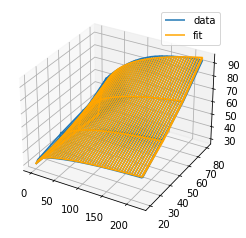

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(TIME,TSET,hal,label='data')
ax.plot_wireframe(TIME,TSET,fitFun([TIME,TSET],*param2d),color='orange',label='fit')
ax.legend()
plt.show()



def makeCsv():
    dF = pd.DataFrame({20:fitFun([TIME,TSET],*param2d)[0],
    40:fitFun([TIME,TSET],*param2d)[1],
    60:fitFun([TIME,TSET],*param2d)[2],
    80:fitFun([TIME,TSET],*param2d)[3]})
    dF.to_csv('fitData3d.csv')
# makeCsv()

##### Plot 2D data, fit using 3D model

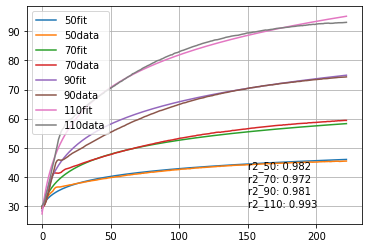

In [ ]:
plt.plot(fitFun([TIME,TSET],*param2d)[0],label='50fit')
plt.plot(hal[0],label='50data')
plt.plot(fitFun([TIME,TSET],*param2d)[1],label='70fit')
plt.plot(hal[1],label='70data')
plt.plot(fitFun([TIME,TSET],*param2d)[2],label='90fit')
plt.plot(hal[2],label='90data')
plt.plot(fitFun([TIME,TSET],*param2d)[3],label='110fit')
plt.plot(hal[3],label='110data')

plt.text(150,30,''.join(['r2_50: ',str(r2(0)),'\n','r2_70: ',str(r2(1)),'\n','r2_90: ',str(r2(2)),'\n','r2_110: ',str(r2(3))]))
plt.grid()
plt.legend()

plt.savefig('comp3dFit.png')

##### Test

98.88184724216624
67.86932031006612
90.06808570553673
58.560089571415716


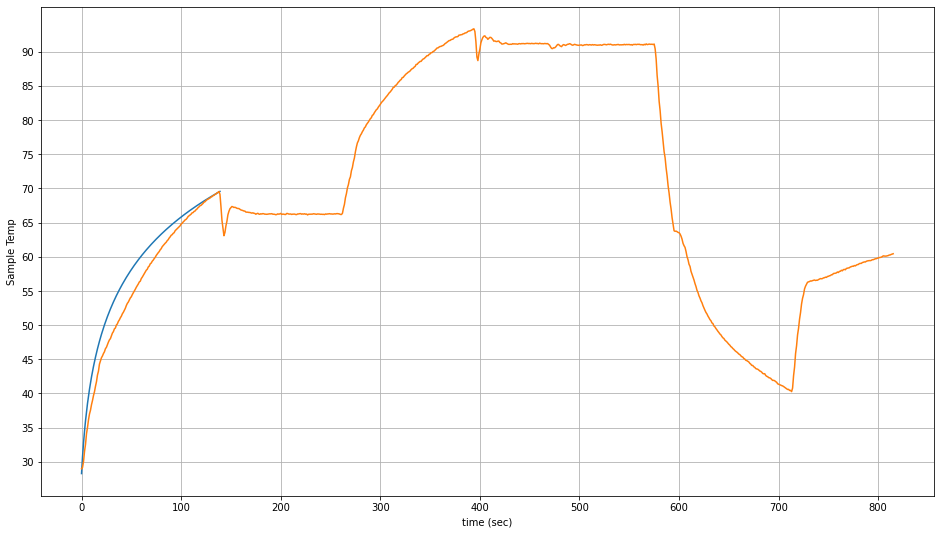

73.72453184317482


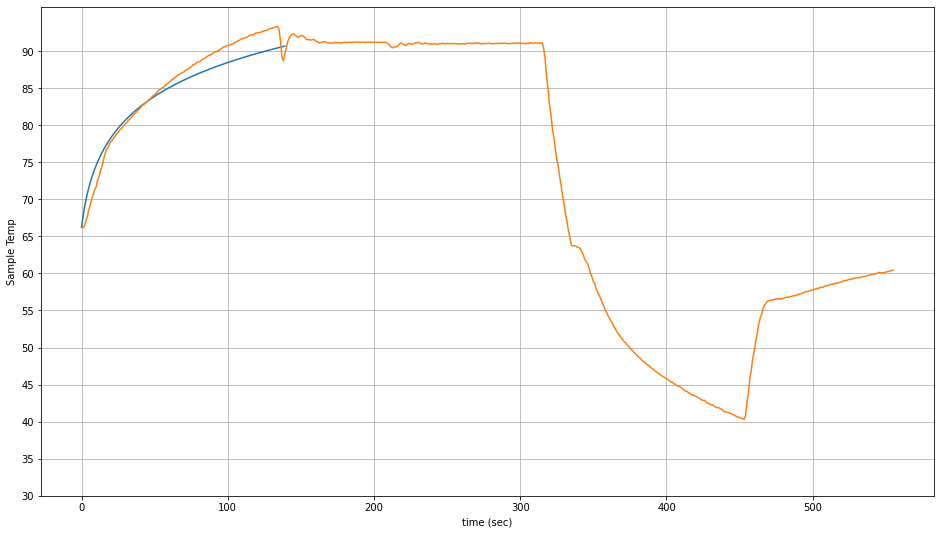

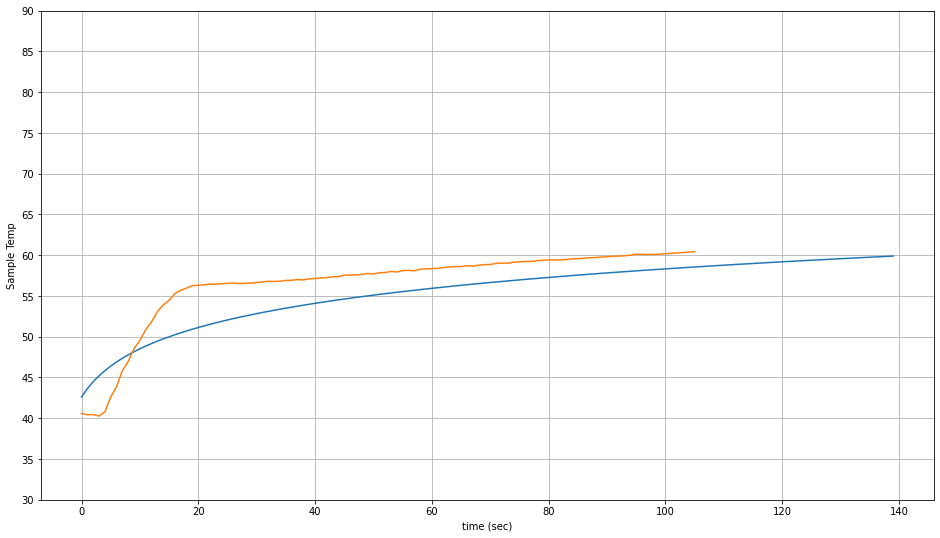

In [ ]:
def Tsamp(time,Tset,T0,a,b,c,d,e,f,g,h):
    return (a*np.log(time**b+c)+d)*(e*(Tset-T0)**f+g)+h
print(Tsamp(200,115,30,*param2d))
time = np.arange(0,140)
print(Tsamp(120,90,30,*param2d))
print(Tsamp(120,115,78,*param2d)+68-30)
print(Tsamp(90,70,47,*param2d)+45-30)

plt.figure(figsize=(16, 9))

# plt.plot(Tsamp(time,115,77,*param2d)+67-30)
plt.plot(Tsamp(time,90,30,*param2d))
plt.plot(np.array(dat.fr1[0][100:]))
# plt.plot(Tsamp(time,70,44,*param2d)+43-30)
plt.yticks(np.arange(30,95,5))
plt.grid()
plt.ylabel('Sample Temp')
plt.xlabel('time (sec)')
plt.show()
# print((Tsamp(time,115,77,*param2d)+67-30)[-1])

plt.figure(figsize=(16, 9))
plt.plot(Tsamp(time,115,77,*param2d)+67-30)
plt.plot(np.array(dat.fr1[0][360:]))
plt.yticks(np.arange(30,95,5))
plt.ylabel('Sample Temp')
plt.xlabel('time (sec)')
plt.grid()

plt.figure(figsize=(16, 9))
plt.plot(Tsamp(time,70,44,*param2d)+43-30)
plt.plot(np.array(dat.fr1[0][810:]))
plt.yticks(np.arange(30,95,5))
plt.ylabel('Sample Temp')
plt.xlabel('time (sec)')
plt.grid()
print(Tsamp(200,90,30,*param2d))

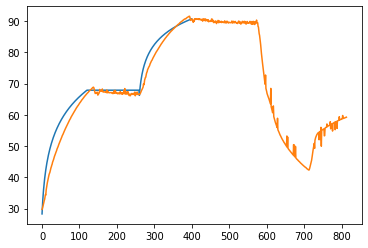

In [ ]:
x = [Tsamp(time,90,30,*param2d)[:120],np.ones(140)*Tsamp(time,90,30,*param2d)[-20],Tsamp(time,115,77,*param2d)+67-30]
y = []
for i in x:
    for u in i:
        y.append(u)
plt.plot(y)
plt.plot(dat.frTesta[100:]);

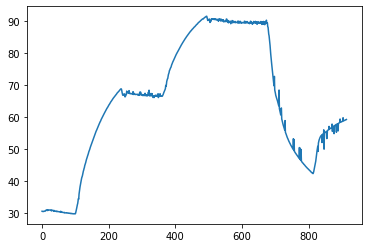

In [ ]:
# plt.plot(dat.fr3)
# plt.plot(dat.frB)
# plt.plot(dat.frC)
plt.plot(dat.frTesta);

''

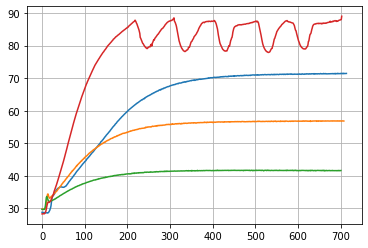

In [ ]:
# %matplotlib qt
# plt.plot(dat.newCup90[0][100:450]*dat.newCup90[1][100:450])
plt.plot(dat.newCup90[0][100:])
# plt.plot(dat.newCup70[1][100:450]*dat.newCup70[0][100:450])
plt.plot(dat.newCup70[0][100:])
# plt.plot(dat.newCup50[1][100:450]*dat.newCup50[0][100:450])
plt.plot(dat.newCup50[0][100:])
# plt.plot(dat.newCup110[1][100:])
plt.plot(dat.newCup110[0][100:])
# print(dat.newCup90[1][100:125])
plt.grid()
;